<a href="https://colab.research.google.com/github/mashdas/Deep_Learning_101/blob/master/shopperAge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

In [137]:
df["product"].unique()

array(['b', 'c', 'a', 'd', 'f', 'e', 'g'], dtype=object)

In [138]:
df.isna().sum()
df=df.dropna()
len(df)

1941

In [139]:
x1=df.iloc[:,3:9]
x2=df.iloc[:,10:]

df

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,vv,c,51017.0,38.233333,1,5.454545,34,14.013489,41,0.881890,0.744094,0.104838,b
1996,1997,kl,d,26576.0,33.358333,2,3.632069,20,8.380497,38,0.944882,0.877953,0.063851,a
1997,1998,kl,d,28595.0,39.425000,3,7.168218,99,4.626950,36,0.759843,0.744094,0.098703,f
1998,1999,qp,c,67949.0,5.733333,0,8.936292,26,3.281439,46,0.909449,0.598425,0.117803,c


In [0]:
X=pd.concat([x1,x2],axis=1)

In [0]:
y=df["age"]


In [0]:
X_prod=pd.get_dummies(X["product"], prefix="prod")

In [0]:
X=pd.concat([X,X_prod],axis=1)

In [0]:
X=X.drop(["product"],axis=1)

In [147]:
y


0       49
1       51
2       44
3       50
4       38
        ..
1995    41
1996    38
1997    36
1998    46
1999    48
Name: age, Length: 1941, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,random_state=42,test_size=0.2)

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [0]:
X_train=X_train.astype(float)
X_test=X_test.astype(float)
scy=StandardScaler()
y_train=scy.fit_transform(y_train.reshape(-1,1))
y_test=scy.transform(y_test.reshape(-1,1))

In [0]:

#y_test,y_train=y_test.astype(float),y_train.astype(float)


from sklearn.linear_model import LinearRegression

model=LinearRegression()
help(model.fit(X_train,y_train))

In [0]:
pred=model.predict(X_test)

In [157]:
model.score(X_test,y_test)

0.9368399980981323

In [186]:
##Got a score of 93.6 using Linear regression
##Comparing it with a NN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import SGD


##Building the NN

model=Sequential()
model.add(Dense(25,input_dim=X_train.shape[1],activation="relu"))

model.add(Dense(25,activation="relu"))

model.add(Dense(25,activation="relu"))
model.add(Dense(25,activation="relu"))

model.add(Dense(25,activation="relu"))
model.add(Dense(25,activation="relu"))

model.add(Dense(25,activation="relu"))

model.add(Dense(1,activation="relu"))




model.compile(loss="mean_squared_logarithmic_error",optimizer=SGD(lr=0.01, momentum=0.9))
monitor=EarlyStopping(monitor="val_loss",min_delta=1e-3,patience=5,verbose=1,
                      mode='auto', restore_best_weights=True)
#checkpointer=ModelCheckpoint(filepath="SOMEPATH",varbose=1,save_bestweights=True)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],epochs=100)

Epoch 1/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0982 - val_loss: 0.0851
Epoch 2/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0803 - val_loss: 0.0667
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0433
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0430 - val_loss: 0.0348
Epoch 5/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0320 - val_loss: 0.0238
Epoch 6/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0209 - val_loss: 0.0176
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.0144
Epoch 8/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.0105
Epoch 9/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0092
Epoch 10/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0090
Epoch 11/

In [0]:
import matplotlib.pyplot as plt
def plot_lc(history,epochs):
  ##Accuracy
  # epoch_range=range(1,epochs+1)
  # plt.plot(epoch_range,history.history['accuracy'])
  # plt.plot(epoch_range,history.history['val_accuracy'])
  # plt.title("Model_accuracy")
  # plt.ylabel("Accuracy")
  # plt.xlabel("Epoch")
  # plt.show()


   ##Loss
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model_loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")

  plt.legend(["Train","Val"],loc="upper left")
  plt.show()

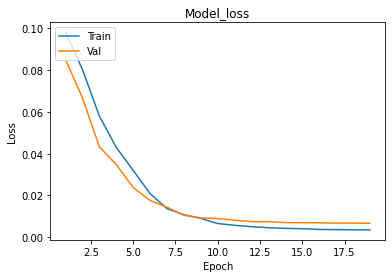

In [189]:
plot_lc(history,19)

In [0]:
##Accuracy sucked so much had to comment it out....might be because of the use of StandardScaler or small amount of Data present